In [205]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [206]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [207]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]

In [208]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100

In [209]:
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100

In [210]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [211]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace = True) 

In [212]:
forecast_out = int(math.ceil(.01*len(df)))

In [213]:
df['label'] = df[forecast_col].shift(-forecast_out)
df.tail()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.343693,0.130884,1990515.0,NaN
2018-03-22,1053.15,2.921711,-2.487014,3418154.0,NaN
2018-03-23,1026.55,3.918952,-2.360729,2413517.0,NaN
2018-03-26,1054.09,0.491419,0.332191,3272409.0,NaN
2018-03-27,1006.94,5.720301,-5.353887,2940957.0,NaN


In [214]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]


In [215]:
df.dropna(inplace = True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

In [216]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9758943407382672


In [218]:
forecast_set = clf.predict(X_lately)

In [219]:
print(forecast_set, accuracy, forecast_out)

[1077.05627374 1091.32695606 1105.28641967 1099.63496601 1093.14009531
 1090.59560963 1088.91437514 1085.80949838 1079.85485582 1075.57130244
 1073.12528596 1093.5438053  1111.89779475 1115.73200704 1130.60688675
 1134.58788424 1132.84265513 1130.58489529 1132.21232612 1151.3443886
 1150.35201374 1159.68826775 1156.30185638 1164.16045991 1185.28915428
 1196.88193398 1191.25081255 1202.98887403 1208.22271076 1207.06408805
 1197.80615755 1202.86674535 1201.85976791 1137.13164343 1085.81029747] 0.9758943407382672 35


In [220]:
df['Forecast'] = np.nan
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,69.078238,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,67.839414,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,68.912727,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,71.219849,NaN


In [221]:
df.iloc[-1]

Adj. Close     1.068760e+03
HL_PCT         4.325574e+00
PCT_Change    -2.893850e+00
Adj. Volume    3.742469e+06
label          1.006940e+03
Forecast                NaN
Name: 2018-02-05 00:00:00, dtype: float64

In [222]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
print(df.head)

<bound method NDFrame.head of              Adj. Close    HL_PCT  PCT_Change  Adj. Volume        label  \
Date                                                                      
2004-08-19    50.322842  3.712563    0.324968   44659000.0    69.078238   
2004-08-20    54.322689  0.710922    7.227007   22834300.0    67.839414   
2004-08-23    54.869377  3.729433   -1.227880   18256100.0    68.912727   
2004-08-24    52.597363  6.417469   -5.726357   15247300.0    70.668146   
2004-08-25    53.164113  1.886792    1.183658    9188600.0    71.219849   
...                 ...       ...         ...          ...          ...   
2018-01-30  1177.370000  0.896914   -0.029718    1792602.0  1094.000000   
2018-01-31  1182.220000  0.346805   -0.134312    1643877.0  1053.150000   
2018-02-01  1181.590000  0.495942    0.476195    2774967.0  1026.550000   
2018-02-02  1119.200000  1.081129   -0.729098    5798880.0  1054.090000   
2018-02-05  1068.760000  4.325574   -2.893850    3742469.0  1006.94000

In [223]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

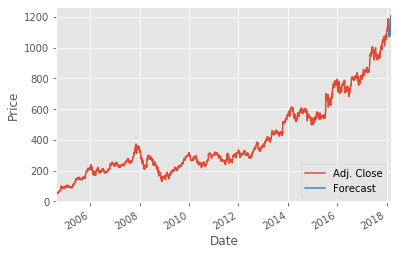

In [224]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()